homogeneous - lmbda=0.5 
 s=35- alphar=0.0 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 268.0, 268.0, 268.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 

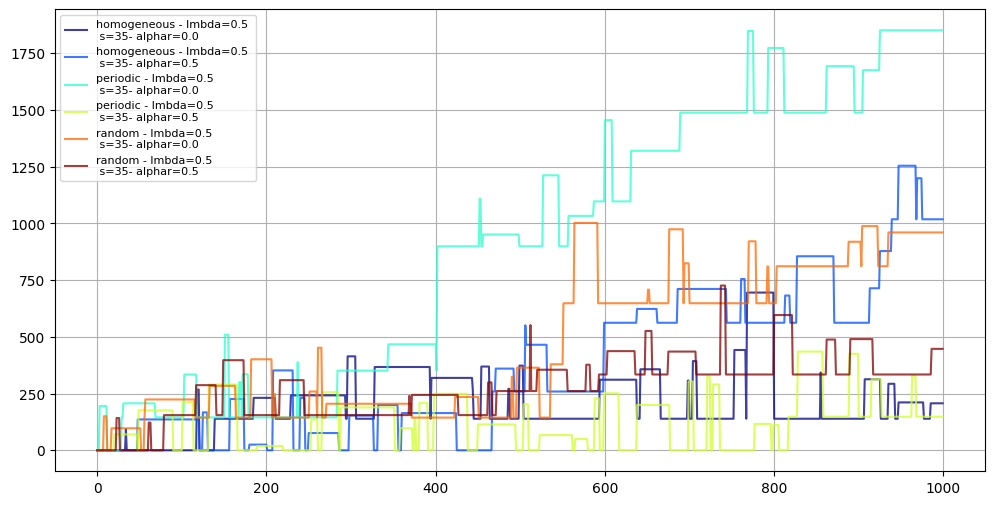

In [36]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-11__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
plt.figure(figsize=(12,6))
n_rows = df_all.height
cmap = plt.cm.jet
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    results     = row["results"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    title       = f"{landscape} - lmbda={lmbda} \n s={s}- alphar={alphar}"
    
    plt.plot(results[1], color=color, alpha=0.75,
             label=title)
    
    print(f"{title} : {results[1]}")

plt.legend(fontsize=8)
plt.grid(True)
plt.show()

shape: (1, 79)
┌───────────┬─────────────┬─────┬─────┬───┬───────────┬─────────────┬───────────┬────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ xt_over_t ┆ G           ┆ bound_low ┆ bound_high │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---       ┆ ---         ┆ ---       ┆ ---        │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ list[f64] ┆ list[f64]   ┆ i64       ┆ i64        │
╞═══════════╪═════════════╪═════╪═════╪═══╪═══════════╪═════════════╪═══════════╪════════════╡
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ [87.42,   ┆ [0.780946,  ┆ 5         ┆ 80         │
│           ┆             ┆     ┆     ┆   ┆ 75.105, … ┆ 0.887063, … ┆           ┆            │
│           ┆             ┆     ┆     ┆   ┆ 5.821261] ┆ 4.60007…    ┆           ┆            │
└───────────┴─────────────┴─────┴─────┴───┴───────────┴─────────────┴───────────┴────────────┘


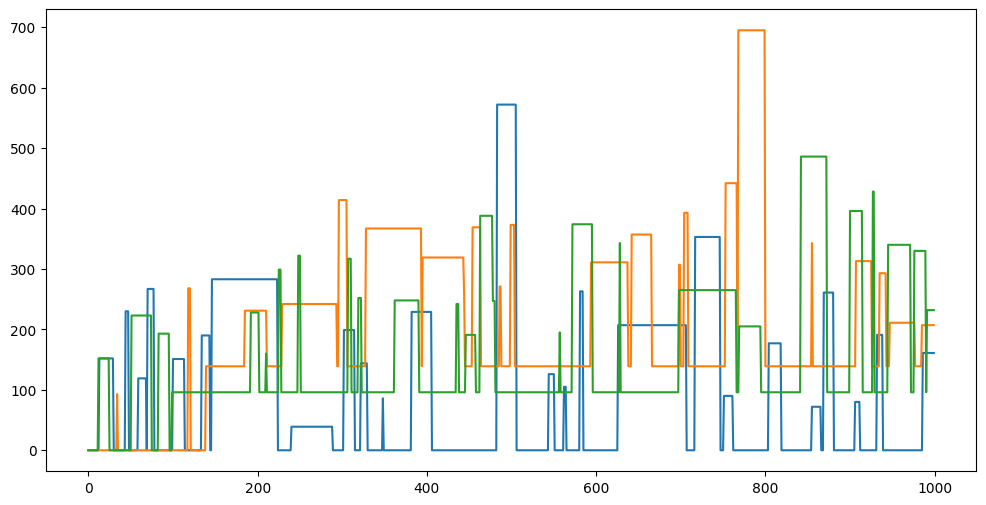

In [45]:
df_single = df_all.filter((pl.col("landscape") == "homogeneous") & (pl.col("alphar") == 0))
print(df_single)

plt.figure(figsize=(12,6))
results = df_single["results"].to_numpy()[0]

for i in range(3):
    plt.plot(results[i])
plt.show()

In [ ]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-11__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
plt.figure(figsize=(12,6))
n_rows = df_all.height
cmap = plt.cm.jet
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    results     = row["results"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    title       = f"{landscape} - lmbda={lmbda} \n s={s}- alphar={alphar}"
    
    plt.plot(results[1], color=color, alpha=0.75,
             label=title)
    
    print(f"{title} : {results[1]}")

plt.legend(fontsize=8)
plt.grid(True)
plt.show()

# .